# Magnetics
**Description:**  Gridded magnetic anomaly data from various sources.

**Datasets:** 

ADMAP-1 data accessed from http://admap.kopri.re.kr/databases.html

Golynsky, Alexander V., Fausto Ferraccioli, Jong Kuk Hong, Dmitry A. Golynsky, Ralph R. B. von Frese, Duncan A. Young, Donald D. Blankenship, et al. “ADMAP2 Magnetic Anomaly Map of the Antarctic - Links to Grid (Grd) Files.” In Supplement to: Golynsky, AV et al. (2018): New Magnetic Anomaly Map of the Antarctic. Geophysical Research Letters, 45(13), 6437-6449, Https://Doi.Org/10.1029/2018GL078153. PANGAEA, 2018. https://doi.org/10.1594/PANGAEA.892723.


**Associated papers:** 

Golynsky, Alexander, Massimo Chiappini, Detlef Damaske, Fausto Ferraccioli, Carol A. Finn, Takemi Ishihara, Hyung Rae Kim, et al. “ADMAP — A Digital Magnetic Anomaly Map of the Antarctic.” In Antarctica: Contributions to Global Earth Sciences, edited by Dieter Karl Fütterer, Detlef Damaske, Georg Kleinschmidt, Hubert Miller, and Franz Tessensohn, 109–16. Berlin, Heidelberg: Springer, 2006. https://doi.org/10.1007/3-540-32934-X_12.

Golynsky, A. V., F. Ferraccioli, J. K. Hong, D. A. Golynsky, R. R. B. von Frese, D. A. Young, D. D. Blankenship, et al. “New Magnetic Anomaly Map of the Antarctic: ADMAP2.” Geophysical Research Letters 45, no. 13 (July 16, 2018): 6437–49. https://doi.org/10.1029/2018GL078153.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, regions

In [2]:
version_names = [
    "admap1",
    "admap2",
    # "admap2_gdb", # doesn't give grid so can't plot
]

grids = []
for name in version_names:
    data = fetch.magnetics(
        version=name,
        # available options
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)

100%|█████████████████████████████████████| 9.79M/9.79M [00:00<00:00, 10.7GB/s]
100%|█████████████████████████████████████| 52.8M/52.8M [00:00<00:00, 68.1GB/s]


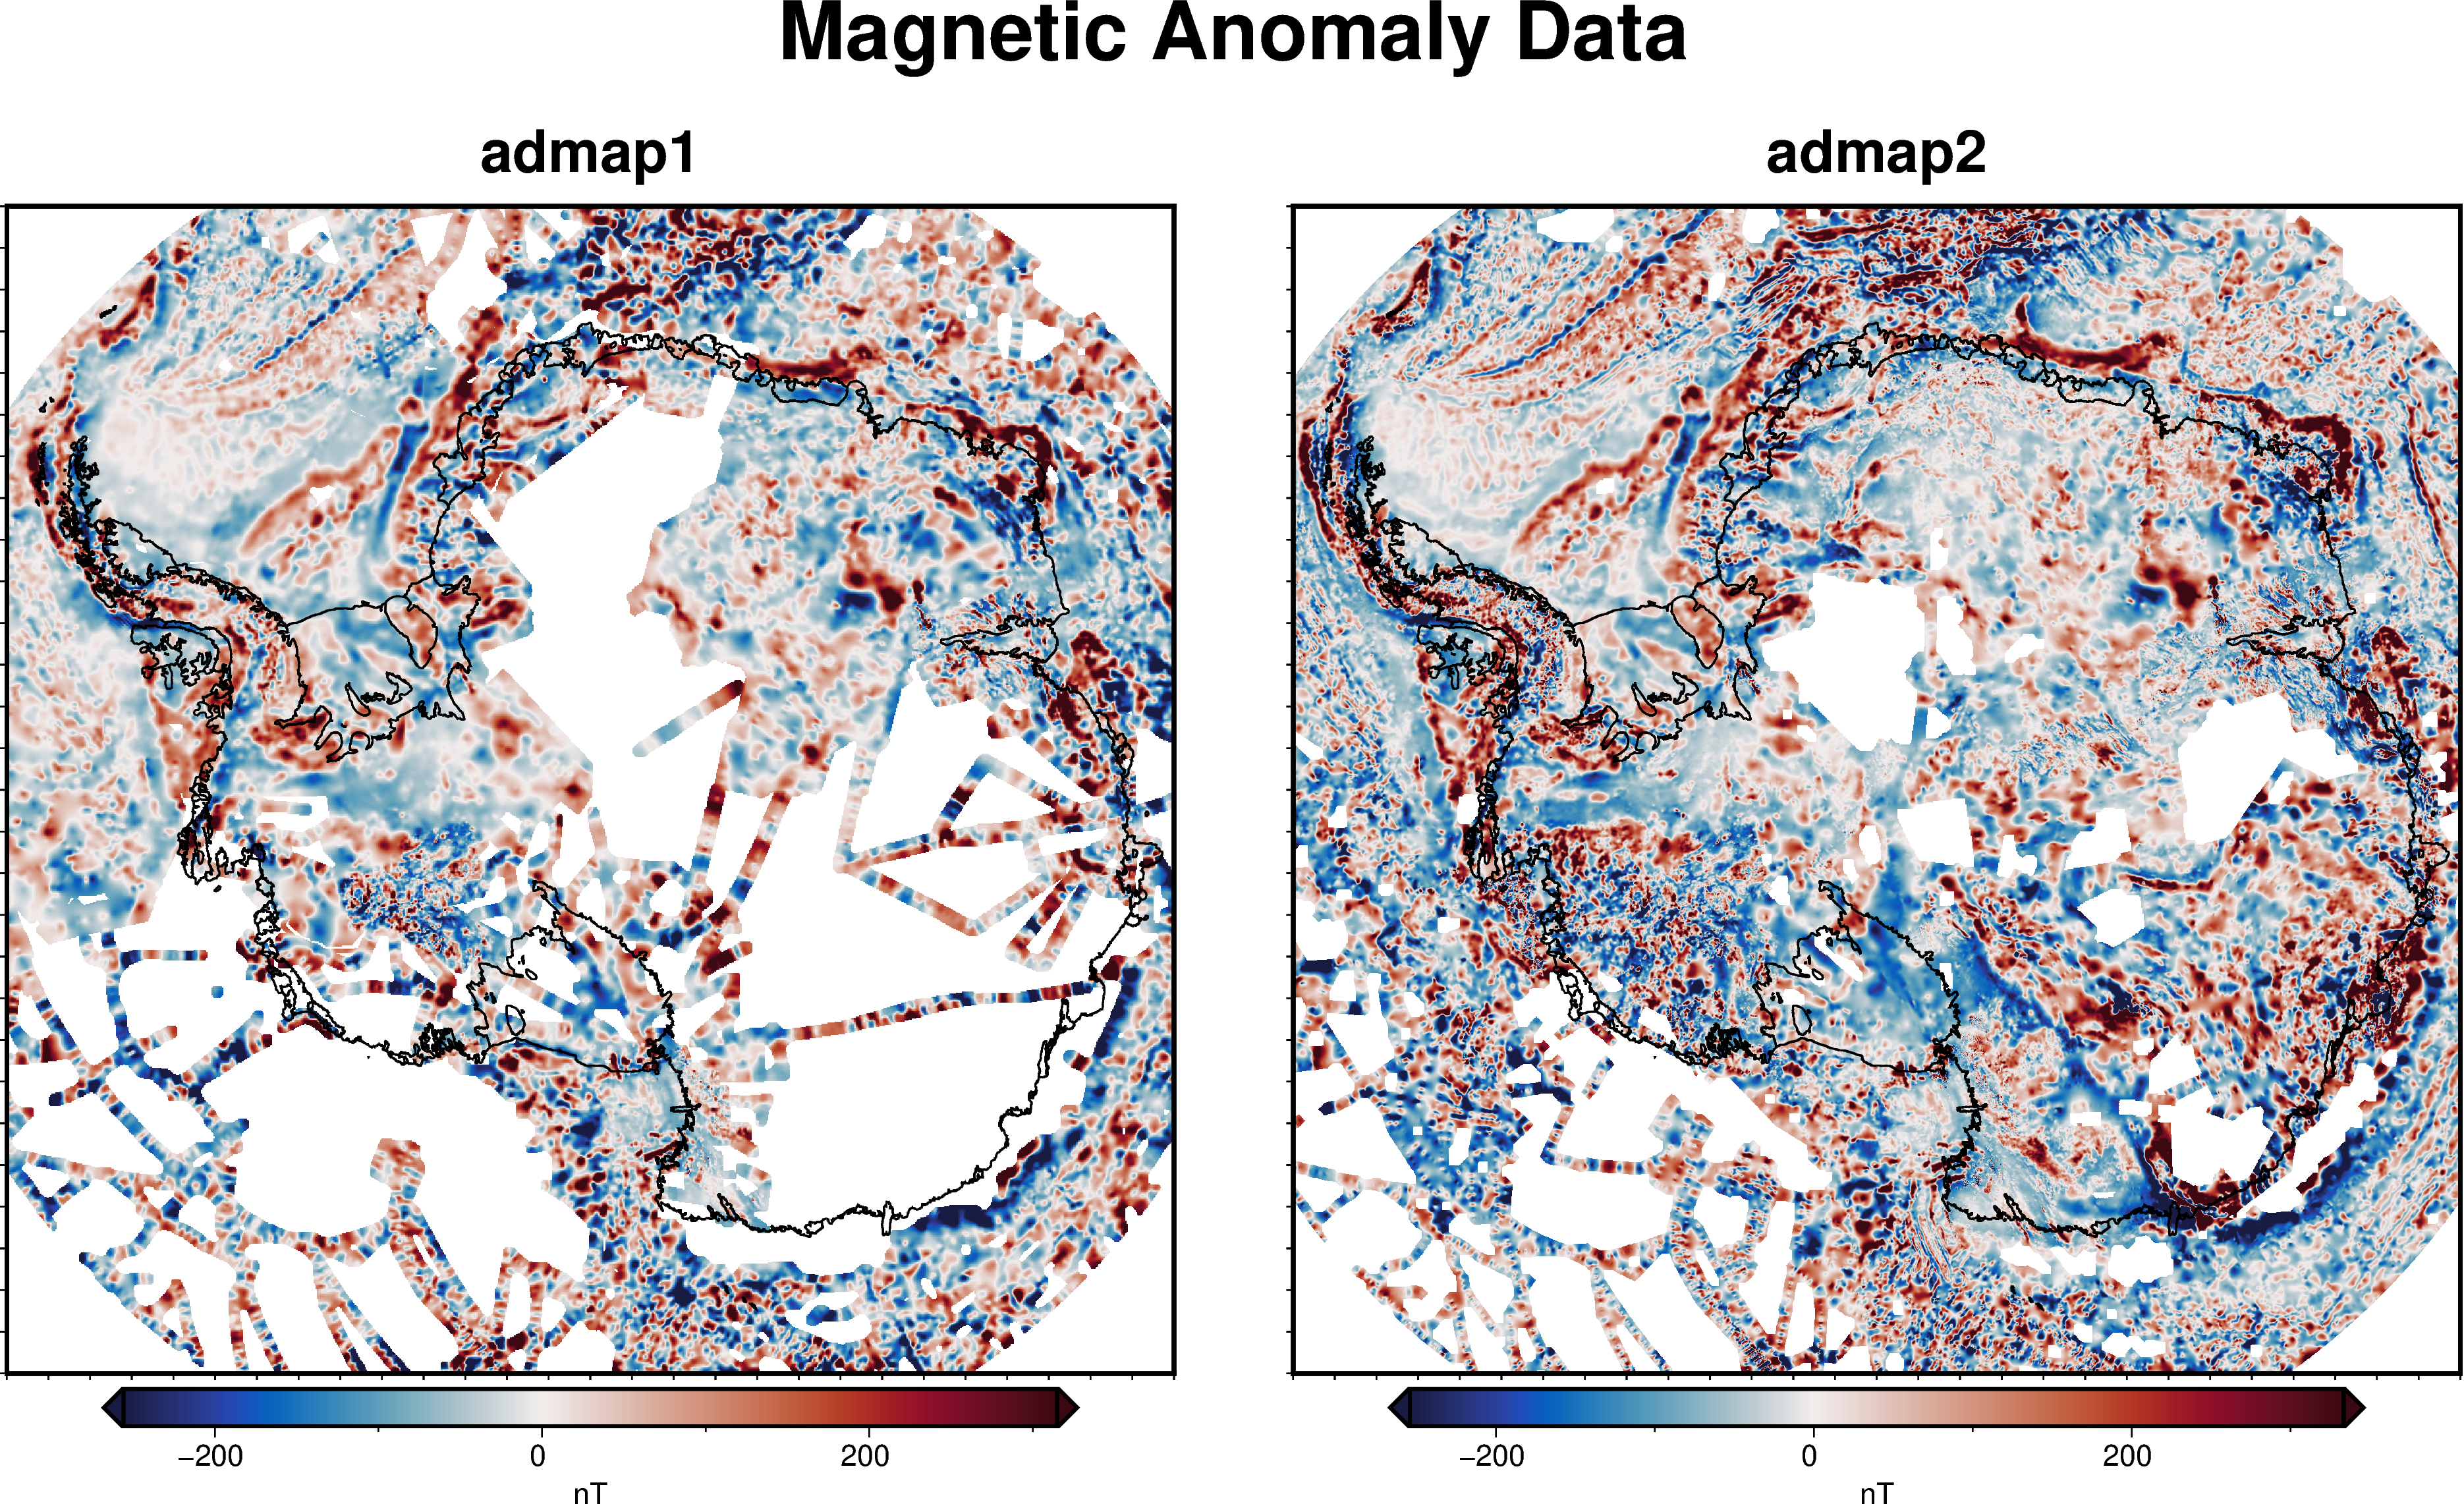

In [3]:
fig = maps.subplots(
    grids,
    region=regions.antarctica,
    fig_title="Magnetic Anomaly Data",
    subplot_titles=version_names,
    cbar_labels=["nT" for x in grids],
    margins=".5c/1.3c",
    coast=True,
    cmaps=["balance+h0" for x in grids],
    hemisphere="south",
    robust=True,
)
fig.show()